## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = len(combined["Mouse ID"].value_counts())

print(f' There are a total of {num_mice} mice')

 There are a total of 249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify duplicate values as boolean 
dupe_mice = combined.duplicated(subset=["Mouse ID", "Timepoint"])

# Reverse index and get ID 
dupe_id = combined[dupe_mice]["Mouse ID"].unique().item()
print(f' There is duplicate data for Mouse ID: {dupe_id}')

 There is duplicate data for Mouse ID: g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
    # only duplicates: duped_data = combined[dupe_mice].reset_index(drop=True)

duped_mouse_data = combined.loc[combined['Mouse ID'] == dupe_id].reset_index()
duped_mouse_data

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,908,g989,Propriva,Female,21,26,0,45.000000,0
1,909,g989,Propriva,Female,21,26,0,45.000000,0
2,910,g989,Propriva,Female,21,26,5,48.786801,0
3,911,g989,Propriva,Female,21,26,5,47.570392,0
4,912,g989,Propriva,Female,21,26,10,51.745156,0
5,913,g989,Propriva,Female,21,26,10,49.880528,0
6,914,g989,Propriva,Female,21,26,15,51.325852,1
7,915,g989,Propriva,Female,21,26,15,53.442020,0
8,916,g989,Propriva,Female,21,26,20,55.326122,1
9,917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Drop duplicate from data 
    # drop ONLY the duplicate data (not the mouse itself): combined_df = combined.drop_duplicates(subset=["Mouse ID", "Timepoint"]).reset_index(drop=True)
    # alt: invert using combined[~dupe_mice]

# Drop all data related to duplicate mouse 
combined_df = combined.loc[combined['Mouse ID'] != dupe_id].reset_index(drop=True)
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

unique_mice = combined[['Mouse ID']]
all_data = pd.merge(unique_mice, combined_df, on="Mouse ID", how='right').drop_duplicates('Mouse ID').reset_index(drop=True)
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,0,45.0,0
244,z435,Propriva,Female,12,26,0,45.0,0
245,z581,Infubinol,Female,24,25,0,45.0,0
246,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(combined_df['Mouse ID'].value_counts())
print(f' There are a total of {num_mice} mice')

 There are a total of 248 mice


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_tumor_mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().round(1)
drug_tumor_var = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().round(1)
drug_tumor_std = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().round(2)
drug_tumor_sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().round(2)

# Assemble the resulting series into a single summary dataframe.
summary_stats_drug = pd.DataFrame({"Tumor Vol. Mean": drug_tumor_mean, 
                            "Tumor Vol. Variance": drug_tumor_var,
                            "Tumor Vol. Standard Deviation": drug_tumor_std,
                            "Tumor Vol. Standard Error": drug_tumor_sem})

summary_stats_drug

,Tumor Vol. Mean,Tumor Vol. Variance,Tumor Vol. Standard Deviation,Tumor Vol. Standard Error
Drug Regimen,,,,
Capomulin,40.7,24.9,4.99,0.33
Ceftamin,52.6,39.3,6.27,0.47
Infubinol,52.9,43.1,6.57,0.49
Ketapril,55.2,68.6,8.28,0.60
Naftisol,54.3,66.2,8.13,0.60
Placebo,54.0,61.2,7.82,0.58
Propriva,52.3,43.9,6.62,0.54
Ramicane,40.2,23.5,4.85,0.32
Stelasyn,54.2,59.5,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_drug = combined_df.groupby('Drug Regimen').agg(
    {'Tumor Volume (mm3)':['mean', 'var', 'std', 'sem']}).round(2)                 
summary_stats_drug

Tumor Volume (mm3)                   
                           mean    var   std   sem
Drug Regimen                                      
Capomulin                 40.68  24.95  4.99  0.33
Ceftamin                  52.59  39.29  6.27  0.47
Infubinol                 52.88  43.13  6.57  0.49
Ketapril                  55.24  68.55  8.28  0.60
Naftisol                  54.33  66.17  8.13  0.60
Placebo                   54.03  61.17  7.82  0.58
Propriva                  52.32  43.85  6.62  0.54
Ramicane                  40.22  23.49  4.85  0.32
Stelasyn                  54.23  59.45  7.71  0.57
Zoniferol                 53.24  48.53  6.97  0.52

## Bar and Pie Charts

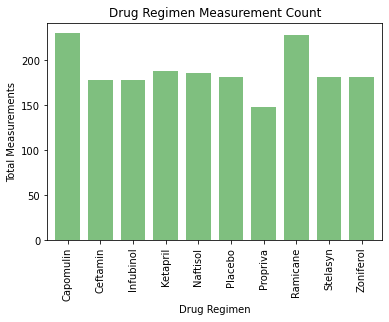

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Get measurement counts 
total_measurements = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()

# Create bar chart 
measurements_pd_bar = total_measurements.plot.bar(x='Drug Regimen', color='green', 
                                                  alpha=0.5, ylabel='Total Measurements', 
                                                  title='Drug Regimen Measurement Count', width=0.75)

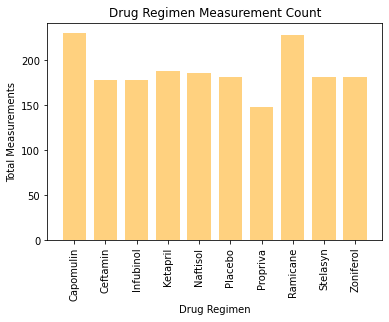

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Set x and y axis 
x_drugs = np.arange(len(total_measurements))
y_counts = total_measurements

# Label ticks 
tick_locations = [value for value in x_drugs]
plt.xticks(tick_locations, total_measurements.index, rotation=90)

# Label axis and title 
plt.xlabel('Drug Regimen')
plt.ylabel('Total Measurements')
plt.title('Drug Regimen Measurement Count')

# Create bar chart
measurements_plt_bar = plt.bar(x_drugs, y_counts, color='orange', alpha=0.5, width=0.75)


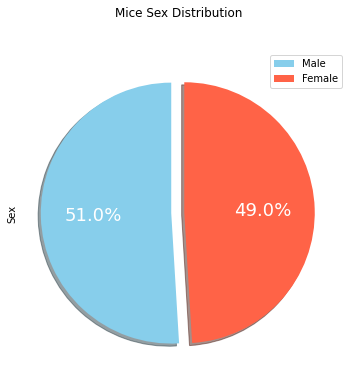

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get value counts 
mouse_sex = combined_df['Sex'].value_counts()

# Create pie plot 
mouse_sex_pd = mouse_sex.plot.pie(subplots=True, startangle=90, colors=['skyblue', 'tomato'], 
                                  autopct="%.1f%%", labeldistance=None, figsize=[6,6], legend=True, 
                                  title='Mice Sex Distribution', explode=(0.1,0), shadow=True, fontsize=18, 
                                 textprops={'color':'white'})


## Quartiles, Outliers and Boxplots

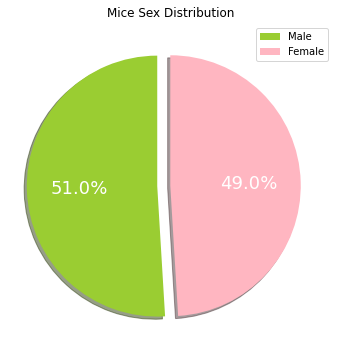

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig, ax = plt.subplots(figsize=(6,6))

mouse_sex_plt = plt.pie(mouse_sex, autopct='%.1f%%', colors=['yellowgreen', 'lightpink'], 
                        startangle=90, explode=(0.1,0), shadow=True, textprops={'fontsize': 18, 'color': 'white'})

plt.title('Mice Sex Distribution')
plt.legend(loc='upper right', labels=mouse_sex.index)

plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last timepoint for each mouse
final_timepoint = combined_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_timepoint = pd.merge(final_timepoint, combined, on=('Mouse ID', 'Timepoint'), how='left')
drug_id_volume = tumor_timepoint[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]

# List treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Select only columns for those treatments
drugs_final_size = drug_id_volume.loc[drug_id_volume['Drug Regimen'].isin(treatments)]

# Create table that groups by drug regimen and ID 
final_size = pd.pivot_table(drugs_final_size, values=['Tumor Volume (mm3)'], index=['Drug Regimen', 'Mouse ID'])
final_size = final_size.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Size'}).round(2)
final_size

Final Tumor Size
Drug Regimen Mouse ID                  
Capomulin    b128                 38.98
             b742                 38.94
             f966                 30.49
             g288                 37.07
             g316                 40.16
...                                 ...
Ramicane     s508                 30.28
             u196                 40.67
             w678                 43.17
             y449                 44.18
             z578                 30.64

[100 rows x 1 columns]

In [204]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for i, row in tumor_timepoint.iterrows():
    for treatment in treatments:
        if row['Drug Regimen'] == treatment:
            tumor_vol_data.append((row['Drug Regimen'], row['Tumor Volume (mm3)']))
            
tumor_vol_df = pd.DataFrame(tumor_vol_data, columns=['Drug Regimen', 'Final Tumor Volume'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Final tumor volumes for each drug 
inf_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Infubinol']
cap_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Capomulin']
ram_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Ramicane']
cef_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Ceftamin']

# Infubinol data
inf_tumor_vol = inf_vol['Final Tumor Volume']
inf_q1 = inf_tumor_vol.quantile(0.25)
inf_q3 = inf_tumor_vol.quantile(0.75)
inf_iqr = inf_q3 - inf_q1
inf_lower_bound = inf_q1 - (1.5 * inf_iqr)
inf_upper_bound = inf_q3 + (1.5 * inf_iqr)

# Capomulin data
cap_tumor_vol = cap_vol['Final Tumor Volume']
cap_q1 = cap_tumor_vol.quantile(0.25)
cap_q3 = cap_tumor_vol.quantile(0.75)
cap_iqr = cap_q3 - cap_q1
cap_lower_bound = cap_q1 - (1.5 * cap_iqr)
cap_upper_bound = cap_q3 + (1.5 * cap_iqr)

# Ramicane data
ram_tumor_vol = ram_vol['Final Tumor Volume']
ram_q1 = ram_tumor_vol.quantile(0.25)
ram_q3 = ram_tumor_vol.quantile(0.75)
ram_iqr = ram_q3 - ram_q1
ram_lower_bound = ram_q1 - (1.5 * ram_iqr)
ram_upper_bound = ram_q3 + (1.5 * ram_iqr)

# Ceftamin data
cef_tumor_vol = cef_vol['Final Tumor Volume']
cef_q1 = cef_tumor_vol.quantile(0.25)
cef_q3 = cef_tumor_vol.quantile(0.75)
cef_iqr = cef_q3 - cef_q1
cef_lower_bound = cef_q1 - (1.5 * cef_iqr)
cef_upper_bound = cef_q3 + (1.5 * cef_iqr)

print(f'Infunibol: Values below {inf_lower_bound.round(2)} mm3 and above {inf_upper_bound.round(2)} mm3 may be outliers')
print(f'Capomulin: Values below {cap_lower_bound.round(2)} mm3 and above {cap_upper_bound.round(2)} mm3 may be outliers')
print(f'Ramicane: Values below {ram_lower_bound.round(2)} mm3 and above {ram_upper_bound.round(2)} mm3 may be outliers')
print(f'Ceftamin: Values below {cef_lower_bound.round(2)} mm3 and above {cef_upper_bound.round(2)} mm3 may be outliers')

Infunibol: Values below 36.83 mm3 and above 82.74 mm3 may be outliers
Capomulin: Values below 20.7 mm3 and above 51.83 mm3 may be outliers
Ramicane: Values below 17.91 mm3 and above 54.31 mm3 may be outliers
Ceftamin: Values below 25.36 mm3 and above 87.67 mm3 may be outliers


<ipython-input-175-d43b07f7b31f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatment for treatment in treatments)


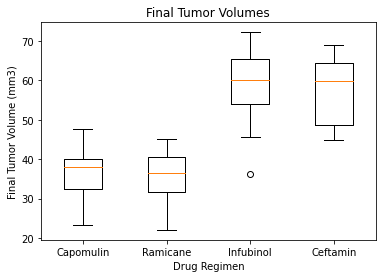

<Figure size 432x288 with 0 Axes>

In [175]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

volumes = [ cap_vol['Final Tumor Volume'], ram_vol['Final Tumor Volume'], inf_vol['Final Tumor Volume'], cef_vol['Final Tumor Volume']]
fig, ax = plt.subplots()
fig = plt.figure()
ax.set_title('Final Tumor Volumes')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.set_xticklabels(treatment for treatment in treatments)
ax.boxplot(volumes)

plt.show()

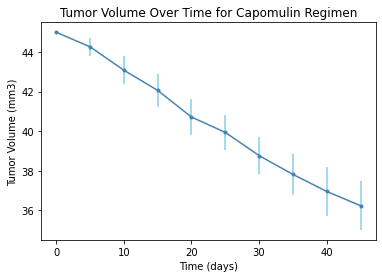

In [176]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select data for Capomulin and get average tumor volume 
cap_data = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
cap_volume = cap_data.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
cap_volume_sem = cap_data.groupby('Timepoint')['Tumor Volume (mm3)'].sem()
x_time = cap_volume.index

# Plot data and format graph 
plt.errorbar(x_time, cap_volume, color='steelblue', marker='.',
             yerr=cap_volume_sem, ecolor='skyblue')

plt.title("Tumor Volume Over Time for Capomulin Regimen")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Print graph 
plt.show()

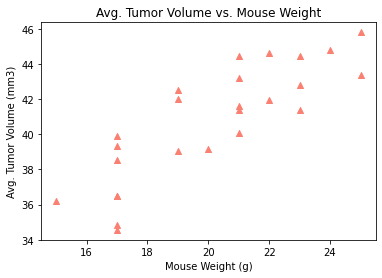

In [272]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Get x and y values 
y_volume = cap_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
x_weight = cap_data.groupby('Mouse ID')['Weight (g)'].mean()

# Plot and format 
plt.scatter(x_weight, y_volume, marker='^', color='salmon')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Avg. Tumor Volume vs. Mouse Weight')

plt.show()

## Correlation and Regression

In [305]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

# Correlation coefficient 
r_sq = st.pearsonr(x_weight, y_volume)
r_sq = r_sq[0].round(2)
r_value = f"r² = {r_sq}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(x_weight, y_volume)
eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
regression = x_weight * slope + intercept

# Print values 
print(eq)
print(r_value)

y = 0.95x + 21.55
r² = 0.84


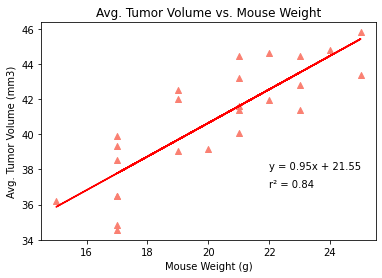

In [306]:
# Scatter plot with regression 

# Print scatter plot again
plt.scatter(x_weight, y_volume, marker='^', color='salmon')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Avg. Tumor Volume vs. Mouse Weight')

# Regression line 
plt.plot(x_weight, regression,'r')
plt.annotate(eq, (22,38), fontsize=10, color='black')
plt.annotate(r_value, (22,37), fontsize=10, color='black')
plt.show()